In this notebook I am going to compare the intersection of predicted HLA binders of different alleles

In [1]:
%matplotlib inline

import os
from tqdm import tqdm, tqdm_notebook
from tqdm import trange
from scipy import stats

import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

import itertools

In [4]:
file_list = ["output/HLA-A02:11_NMP_9mer_proc.txt",
             "output/HLA-A30:01_NMP_9mer_proc.txt",
             "output/HLA-A24:03_NMP_9mer_proc.txt",
             "output/HLA-B15:03_NMP_9mer_proc.txt"]
comb = itertools.combinations(file_list, 2)
print(list(comb))

[('output/HLA-A02:11_NMP_9mer_proc.txt', 'output/HLA-A30:01_NMP_9mer_proc.txt'), ('output/HLA-A02:11_NMP_9mer_proc.txt', 'output/HLA-A24:03_NMP_9mer_proc.txt'), ('output/HLA-A02:11_NMP_9mer_proc.txt', 'output/HLA-B15:03_NMP_9mer_proc.txt'), ('output/HLA-A30:01_NMP_9mer_proc.txt', 'output/HLA-A24:03_NMP_9mer_proc.txt'), ('output/HLA-A30:01_NMP_9mer_proc.txt', 'output/HLA-B15:03_NMP_9mer_proc.txt'), ('output/HLA-A24:03_NMP_9mer_proc.txt', 'output/HLA-B15:03_NMP_9mer_proc.txt')]


In [7]:
df1 = pd.read_csv("output/HLA-B15:03_NMP_9mer_proc.txt", sep=' ')
df2 = pd.read_csv("output/HLA-A24:03_NMP_9mer_proc.txt", sep=' ')
df.head()

,HLA,Peptide,Aff(nM)
0,HLA-B*15:03,AAIAPFQGR,13353.7
1,HLA-B*15:03,AAIAPFQSA,488.6
2,HLA-B*15:03,AAIAPGEGD,30097.3
3,HLA-B*15:03,AAIAPIIAA,848.6
4,HLA-B*15:03,AAIAPKDDL,6584.0


In [9]:
"""
pd.Series(list(set(s1).intersection(set(s2))))
"""
df1b = df1[df1['Aff(nM)']<=500]
df2b = df2[df2['Aff(nM)']<=500]
df1bs = set(df1b.Peptide)
df2bs = set(df2b.Peptide)
inter = pd.Series(list(df1bs.intersection(df2bs)))
len(inter), inter.head()

(74936, 0    AVAVWYFPF
 1    GFWITDQLF
 2    FSPVPSSTF
 3    MTLYAAFCF
 4    CMSKFTVLF
 dtype: object)

In [2]:
file_list = []
for name in os.listdir("output/netMHCpan/"):
    if "NMP" in name:
        file_list.append(name)
for i, s in enumerate(file_list):
    file_list[i] = s.replace("_NMP_9mer_proc.txt", "")
file_list.sort()

In [3]:
file_dict = {}
for file in tqdm_notebook(file_list):
    df = pd.read_csv("output/netMHCpan/" + file + "_NMP_9mer_proc.txt", sep=" ")
    dfb = df[df['Aff(nM)']<=500]
    dfp = dfb.Peptide
    file_dict[file] = dfp

In [9]:
df = pd.DataFrame(index=file_list, columns=file_list)
for file1, file2 in tqdm_notebook(itertools.combinations(file_list, 2)):
    inter = np.intersect1d(file_dict[file1], file_dict[file2])
#     inter = pd.Series(list(set(file_dict[file1]).intersection(set(file_dict[file2]))))
    df.loc[file1, file2] = inter.size

In [1]:
df.to_csv("output/intersections.csv")

NameError: name 'df' is not defined

In [52]:
df1 = df
df1[df.isnull()] = 0
df1.iloc[1:5,1:5]

,HLA-A02:01,HLA-A02:02,HLA-A02:03,HLA-A02:05
HLA-A02:01,0,325433,297791,273239
HLA-A02:02,0,0,420181,366204
HLA-A02:03,0,0,0,340426
HLA-A02:05,0,0,0,0


In [4]:
df2 = pd.read_csv("output/intersections.csv")
df3 = df2['Unnamed: 0']
df2 = df2.drop("Unnamed: 0", axis=1)
df2.index = df3
# df2 = df2.drop("Unnamed: 0", axis=0)
del df2.index.name
df2 = df2.fillna(0)
df2.head()

,HLA-A01:01,HLA-A02:01,HLA-A02:02,HLA-A02:03,HLA-A02:05,HLA-A02:06,HLA-A02:07,HLA-A02:11,HLA-A02:12,HLA-A02:16,...,HLA-C04:01,HLA-C05:01,HLA-C06:02,HLA-C07:01,HLA-C07:02,HLA-C08:02,HLA-C12:03,HLA-C14:02,HLA-C15:02,HLA-E01:01
HLA-A01:01,0.0,1015.0,1216.0,398.0,1348.0,2220.0,72.0,2176.0,880.0,1157.0,...,18.0,6475.0,111.0,136.0,603.0,3321.0,13231.0,5815.0,3155.0,0.0
HLA-A02:01,0.0,0.0,325433.0,297791.0,273239.0,295964.0,17461.0,337104.0,306684.0,334406.0,...,34.0,14794.0,1845.0,1832.0,5522.0,7878.0,97165.0,54671.0,38506.0,198.0
HLA-A02:02,0.0,0.0,0.0,420181.0,366204.0,357689.0,17461.0,494887.0,346843.0,377429.0,...,69.0,20754.0,2626.0,2736.0,9050.0,10925.0,143472.0,81906.0,58750.0,257.0
HLA-A02:03,0.0,0.0,0.0,0.0,340426.0,341023.0,17458.0,457080.0,318702.0,342559.0,...,21.0,11924.0,2596.0,2431.0,6627.0,6899.0,141047.0,69353.0,58777.0,240.0
HLA-A02:05,0.0,0.0,0.0,0.0,0.0,383217.0,17460.0,380600.0,271277.0,301416.0,...,42.0,19468.0,2959.0,2946.0,8716.0,11384.0,174338.0,81047.0,80448.0,220.0


In [6]:
df2.shape

(82, 82)

In [6]:
# df1 = df.fillna(0)
df_add = df2.add(df2.T, fill_value=0)
# df_add.head()

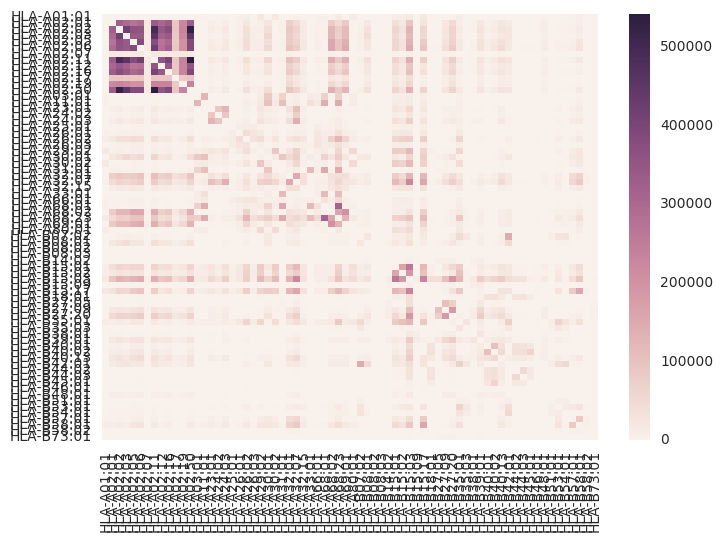

In [45]:
g = sns.heatmap(df_add.iloc[0:70, 0:70].T)

In [26]:
df2.transpose().iloc[1:5,1:5]

,HLA-A02:01,HLA-A02:02,HLA-A02:03,HLA-A02:05
HLA-A02:01,0.0,0.0,0.0,0.0
HLA-A02:02,325433.0,0.0,0.0,0.0
HLA-A02:03,297791.0,420181.0,0.0,0.0
HLA-A02:05,273239.0,366204.0,340426.0,0.0


In [38]:
for col in df2:
    if len(df2[col].unique()) == 1:
        print(df2[col].name, end=" ")

HLA-A01:01 

In [3]:
data = pd.read_csv("data/mhc_seq_imghtla.csv")
data.head()

,mhc,sequence,pseudo
0,HLAA0201,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,YFAMYGEKVAHTHVDTLYYRYHYYTWAVLAYTWY
1,HLAA0211,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,YFAMYGEKVAHIDVDTLYYRYHYYTWAVLAYTWY
2,HLAA2402,SHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,YSAMYEEKVAHTDENIAYYMFHYYTWAVQAYTGY
3,HLAA8001,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDSQFVQFDSDAASQRMEP...,YFAMYEENVAHTNANTLYYIYRDYTWARLAYEGY
4,HLAA3001,SHSMRYFSTSVSRPGSGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,YSAMYQENVAQTDVDTLYYIYEHYTWAWLAYTWY


In [4]:
data.describe()

,mhc,sequence,pseudo
count,103,103,103
unique,103,103,100
top,HLAB5301,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,YYSEYRNICTNTDESNLYYWYNFYTWAELAYTWH
freq,1,1,2


In [5]:
from Levenshtein import hamming
def ham_dist_dict(data, dist, line_n):
    df_chunks = []
    for i, s_line in enumerate(data['pseudo']):
        result = hamming(data['pseudo'].iloc[line_n], s_line)
        if result <= dist:
            dict_ = {"mhc1" : data['mhc'].iloc[line_n], "mhc2" : data['mhc'].iloc[i], "dist": result}
            df_chunks.append(pd.DataFrame(dict_, index=[0]))
    df_ = pd.concat(df_chunks)
    return df_

In [9]:
mhc_list = [i.replace(':','') for i in file_list]
mhc_list = [i.replace('-','') for i in mhc_list]
mhc_list[10]

'HLAA0217'

In [10]:
d = data[data['mhc'].isin(mhc_list)]
d.index = range(d.shape[0])

In [11]:
df_chunks = []
for i in tqdm_notebook(d.index):
    df_ = ham_dist_dict(d, dist=100, line_n=i)
    df_chunks.append(df_)
mhc_dist = pd.concat(df_chunks)
mhc_dist.index = range(len(mhc_dist))
mhc_dist.head()

,dist,mhc1,mhc2
0,0,HLAA0201,HLAA0201
1,2,HLAA0201,HLAA0211
2,11,HLAA0201,HLAA2402
3,11,HLAA0201,HLAA8001
4,9,HLAA0201,HLAA3001


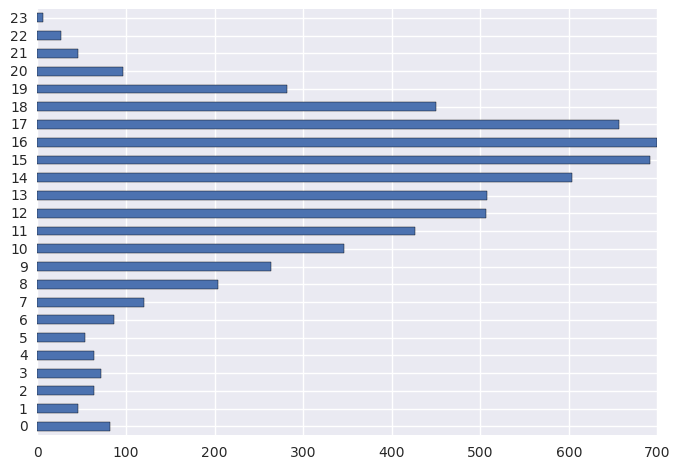

In [12]:
mhc_dist.dist.value_counts().sort_index().plot.barh()

In [13]:
mhc_dist.mhc1 = mhc_dist.mhc1.apply(lambda x: x[0:3]+'-'+x[3:6]+':'+x[6:len(x)])

In [14]:
mhc_dist.mhc2 = mhc_dist.mhc2.apply(lambda x: x[0:3]+'-'+x[3:6]+':'+x[6:len(x)])
mhc_dist.head()

,dist,mhc1,mhc2
0,0,HLA-A02:01,HLA-A02:01
1,2,HLA-A02:01,HLA-A02:11
2,11,HLA-A02:01,HLA-A24:02
3,11,HLA-A02:01,HLA-A80:01
4,9,HLA-A02:01,HLA-A30:01


In [36]:
mhc_df1 = pd.pivot_table(mhc_dist, values='dist', index=['mhc1'], columns=['mhc2'])
idx = mhc_df1.columns.union(mhc_df1.index)
mhc_df1 = mhc_df1.reindex(index = idx, columns=idx, fill_value=0)
# I replace 0 in diagonal
mhc_df1 = mhc_df1.replace(0, 1)
mhc_df1.head()

,HLA-A01:01,HLA-A02:01,HLA-A02:02,HLA-A02:03,HLA-A02:05,HLA-A02:06,HLA-A02:07,HLA-A02:11,HLA-A02:12,HLA-A02:16,...,HLA-C03:03,HLA-C04:01,HLA-C05:01,HLA-C06:02,HLA-C07:02,HLA-C08:02,HLA-C12:03,HLA-C14:02,HLA-C15:02,HLA-E01:01
HLA-A01:01,1,15,15,15,16,16,16,15,15,15,...,19,19,17,20,22,18,20,19,17,22
HLA-A02:01,15,1,1,2,2,1,1,2,1,1,...,12,15,13,16,16,13,15,15,13,18
HLA-A02:02,15,1,1,1,1,2,2,3,1,2,...,13,15,13,15,17,13,14,15,14,18
HLA-A02:03,15,2,1,1,2,3,3,4,2,3,...,12,14,12,14,17,12,13,14,13,17
HLA-A02:05,16,2,1,2,1,1,3,4,2,3,...,12,15,12,15,17,12,13,15,13,18


In [21]:
df2.index ^ mhc_df1.index

Index(['HLA-B27:09', 'HLA-C07:01'], dtype='object')

In [22]:
df2 = df2.drop(['HLA-B27:09', 'HLA-C07:01'], axis = 0)
df2 = df2.drop(['HLA-B27:09', 'HLA-C07:01'], axis = 1)
df2.head()

,HLA-A01:01,HLA-A02:01,HLA-A02:02,HLA-A02:03,HLA-A02:05,HLA-A02:06,HLA-A02:07,HLA-A02:11,HLA-A02:12,HLA-A02:16,...,HLA-C03:03,HLA-C04:01,HLA-C05:01,HLA-C06:02,HLA-C07:02,HLA-C08:02,HLA-C12:03,HLA-C14:02,HLA-C15:02,HLA-E01:01
HLA-A01:01,0.0,1015.0,1216.0,398.0,1348.0,2220.0,72.0,2176.0,880.0,1157.0,...,2733.0,18.0,6475.0,111.0,603.0,3321.0,13231.0,5815.0,3155.0,0.0
HLA-A02:01,0.0,0.0,325433.0,297791.0,273239.0,295964.0,17461.0,337104.0,306684.0,334406.0,...,69118.0,34.0,14794.0,1845.0,5522.0,7878.0,97165.0,54671.0,38506.0,198.0
HLA-A02:02,0.0,0.0,0.0,420181.0,366204.0,357689.0,17461.0,494887.0,346843.0,377429.0,...,103535.0,69.0,20754.0,2626.0,9050.0,10925.0,143472.0,81906.0,58750.0,257.0
HLA-A02:03,0.0,0.0,0.0,0.0,340426.0,341023.0,17458.0,457080.0,318702.0,342559.0,...,95378.0,21.0,11924.0,2596.0,6627.0,6899.0,141047.0,69353.0,58777.0,240.0
HLA-A02:05,0.0,0.0,0.0,0.0,0.0,383217.0,17460.0,380600.0,271277.0,301416.0,...,127911.0,42.0,19468.0,2959.0,8716.0,11384.0,174338.0,81047.0,80448.0,220.0


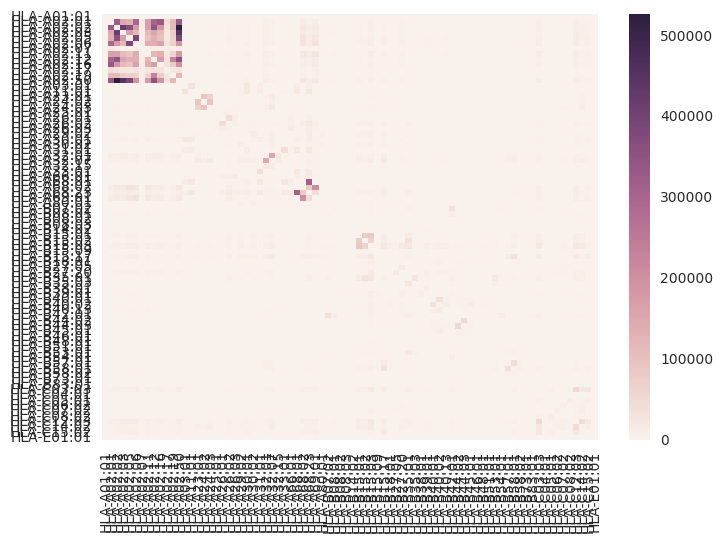

In [39]:
df2_proc = df2.add(df2.T, fill_value=0)
df2_proc = df2_proc.divide(mhc_df1, fill_value=0)
h = sns.heatmap(df2_proc)

In [41]:
df2_proc.head()

,HLA-A01:01,HLA-A02:01,HLA-A02:02,HLA-A02:03,HLA-A02:05,HLA-A02:06,HLA-A02:07,HLA-A02:11,HLA-A02:12,HLA-A02:16,...,HLA-C03:03,HLA-C04:01,HLA-C05:01,HLA-C06:02,HLA-C07:02,HLA-C08:02,HLA-C12:03,HLA-C14:02,HLA-C15:02,HLA-E01:01
HLA-A01:01,0.000000,67.666667,81.066667,26.533333,84.25,138.750000,4.500000,145.066667,58.666667,77.133333,...,143.842105,0.947368,380.882353,5.550000,27.409091,184.500000,661.550000,306.052632,185.588235,0.000000
HLA-A02:01,67.666667,0.000000,325433.000000,148895.500000,136619.50,295964.000000,17461.000000,168552.000000,306684.000000,334406.000000,...,5759.833333,2.266667,1138.000000,115.312500,345.125000,606.000000,6477.666667,3644.733333,2962.000000,11.000000
HLA-A02:02,81.066667,325433.000000,0.000000,420181.000000,366204.00,178844.500000,8730.500000,164962.333333,346843.000000,188714.500000,...,7964.230769,4.600000,1596.461538,175.066667,532.352941,840.384615,10248.000000,5460.400000,4196.428571,14.277778
HLA-A02:03,26.533333,148895.500000,420181.000000,0.000000,170213.00,113674.333333,5819.333333,114270.000000,159351.000000,114186.333333,...,7948.166667,1.500000,993.666667,185.428571,389.823529,574.916667,10849.769231,4953.785714,4521.307692,14.117647
HLA-A02:05,84.250000,136619.500000,366204.000000,170213.000000,0.00,383217.000000,5820.000000,95150.000000,135638.500000,100472.000000,...,10659.250000,2.800000,1622.333333,197.266667,512.705882,948.666667,13410.615385,5403.133333,6188.307692,12.222222


In [7]:
for key in file_dict.keys():
    df_add.loc[key, key] = file_dict[key].size

In [9]:
df_norm = df_add.apply(lambda r: df_add.sum()[r.name]*df_add.sum(1)[r.index]/df_add.sum().sum())

In [14]:
df_norm.head()

,HLA-A01:01,HLA-A02:01,HLA-A02:02,HLA-A02:03,HLA-A02:05,HLA-A02:06,HLA-A02:07,HLA-A02:11,HLA-A02:12,HLA-A02:16,...,HLA-C04:01,HLA-C05:01,HLA-C06:02,HLA-C07:01,HLA-C07:02,HLA-C08:02,HLA-C12:03,HLA-C14:02,HLA-C15:02,HLA-E01:01
HLA-A01:01,586.375181,8930.355925,11905.761253,11010.033042,11068.830569,11752.241852,661.063876,13129.331474,8932.941319,9992.246920,...,7.412566,1045.778340,908.758678,991.195274,1972.968041,605.677661,9999.493888,7619.503306,4047.610988,8.996094
HLA-A02:01,8930.355925,136007.217694,181321.940145,167680.210433,168575.682921,178983.875822,10067.847153,199956.626473,136046.592633,152179.567475,...,112.891638,15926.957848,13840.180665,15095.670608,30047.838637,9224.328147,152289.937099,116043.240996,61644.162159,137.008394
HLA-A02:02,11905.761253,181321.940145,241734.567733,223547.702798,224741.527741,238617.509930,13422.240450,266577.936610,181374.433979,202882.574122,...,150.504739,21233.482653,18451.435539,20125.228123,40059.141649,12297.678788,203029.716566,154706.389520,82182.690528,182.656687
HLA-A02:03,11010.033042,167680.210433,223547.702798,206729.123994,207833.131691,220665.156384,12412.420148,246521.984442,167728.754901,187618.733258,...,139.181537,19635.984684,17063.244478,18611.109522,37045.297972,11372.464719,187754.805462,143067.076876,75999.687797,168.914538
HLA-A02:05,11068.830569,168575.682921,224741.527741,207833.131691,208943.035186,221843.587495,12478.706925,247838.500293,168624.486634,188620.684612,...,139.924817,19740.847887,17154.368326,18710.499524,37243.133155,11433.197761,188757.483491,143831.106400,76405.553399,169.816602


In [20]:
df_norm.mean().mean(), df_norm.min().min(), df_norm.max().max()

(20352.574063057702, 0.09370474721986824, 293974.49009267089)

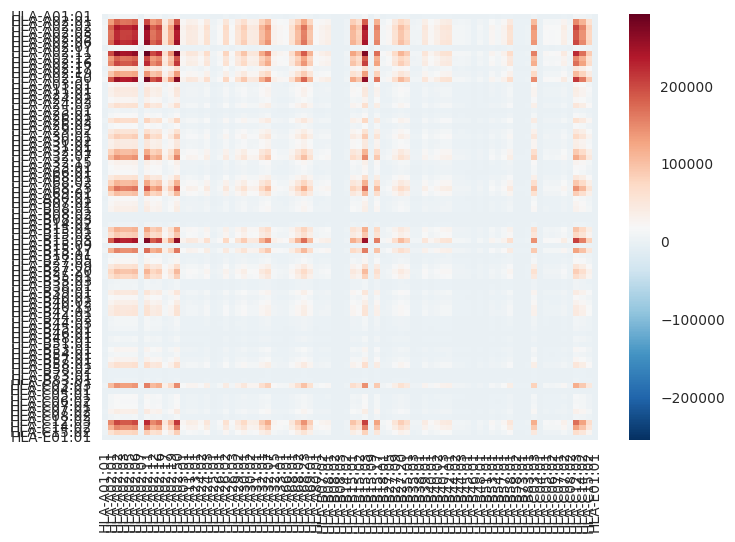

In [26]:
n = sns.heatmap(df_norm, center=20353)

In [16]:
df_norm.applymap(np.log2).mean().mean()

11.989246007667326

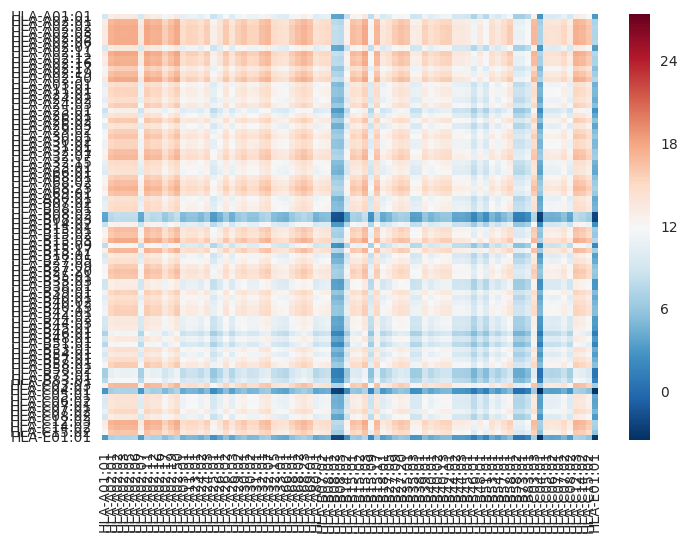

In [17]:
m = sns.heatmap(df_norm.applymap(np.log2), center = 12)

In [27]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [40]:
data_dist = pdist(df_norm)
data_link = linkage(data_dist)

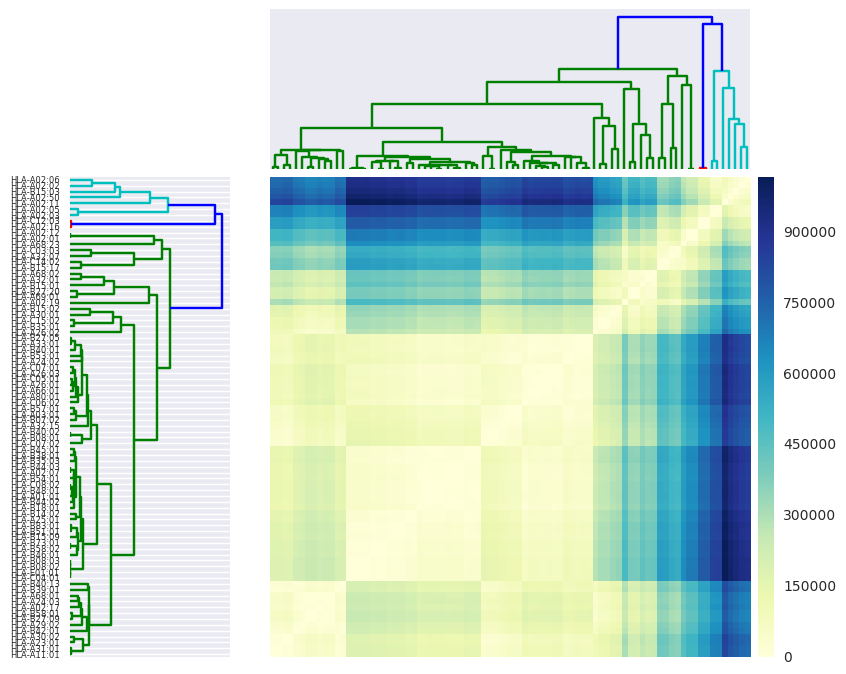

In [43]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='single')
Z1 = dendrogram(Y, orientation='right', labels=df_norm.index) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)

In [47]:
fig.savefig('output/temp.png', dpi=200)

In [46]:
os.getcwd()

'/home/vcvetkov/Projects/ipred'